In [96]:
%load_ext autoreload
%autoreload 2

In [97]:
import torch
import torch.nn as nn
import numpy as np

import matplotlib.pyplot as plt


In [98]:
N = 8192
d_in, d_out = 64, 64
X = torch.randn((N, d_out))
W = torch.randn((d_out, d_in))
Y = X @ W

In [112]:
max_power = 15
error_RRR = {2**i: [] for i in range(max_power)}
error_LR = {2**i: [] for i in range(max_power)}

U_LR, S_LR, V_LR = torch.linalg.svd(W)

ranks = range(1, min(d_in, d_out)+1)
list_samples = [2**i for i in range(max_power)]
for rank in ranks:
    print(f"---------------- RRR vs LR for rank {rank} ----------------")
    for n in list_samples:
        print(f" - Samples {n}")
        U_RRR, S_RRR, V_RRR = torch.linalg.svd(X[:n] @ W, full_matrices=False)
        W_RRR = W @ V_RRR[:rank, :].T @ V_RRR[:rank, :]
        W_LR = U_LR[:, :rank] @ torch.diag(S_LR[:rank]) @ V_LR[:rank, :]

        error_RRR[n].append(torch.linalg.norm(Y[:n] - X[:n] @ W_RRR, ord="fro"))
        error_LR[n].append(torch.linalg.norm(Y[:n] - X[:n] @ W_LR, ord="fro"))


---------------- RRR vs LR for rank 1 ----------------
 - Samples 1
 - Samples 2
 - Samples 4
 - Samples 8
 - Samples 16
 - Samples 32
 - Samples 64
 - Samples 128
 - Samples 256
 - Samples 512
 - Samples 1024
 - Samples 2048
 - Samples 4096
 - Samples 8192
 - Samples 16384
---------------- RRR vs LR for rank 2 ----------------
 - Samples 1
 - Samples 2
 - Samples 4
 - Samples 8
 - Samples 16
 - Samples 32
 - Samples 64
 - Samples 128
 - Samples 256
 - Samples 512
 - Samples 1024
 - Samples 2048
 - Samples 4096
 - Samples 8192
 - Samples 16384
---------------- RRR vs LR for rank 3 ----------------
 - Samples 1
 - Samples 2
 - Samples 4
 - Samples 8
 - Samples 16
 - Samples 32
 - Samples 64
 - Samples 128
 - Samples 256
 - Samples 512
 - Samples 1024
 - Samples 2048
 - Samples 4096
 - Samples 8192
 - Samples 16384
---------------- RRR vs LR for rank 4 ----------------
 - Samples 1
 - Samples 2
 - Samples 4
 - Samples 8
 - Samples 16
 - Samples 32
 - Samples 64
 - Samples 128
 - Samples 

<function matplotlib.pyplot.plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'>

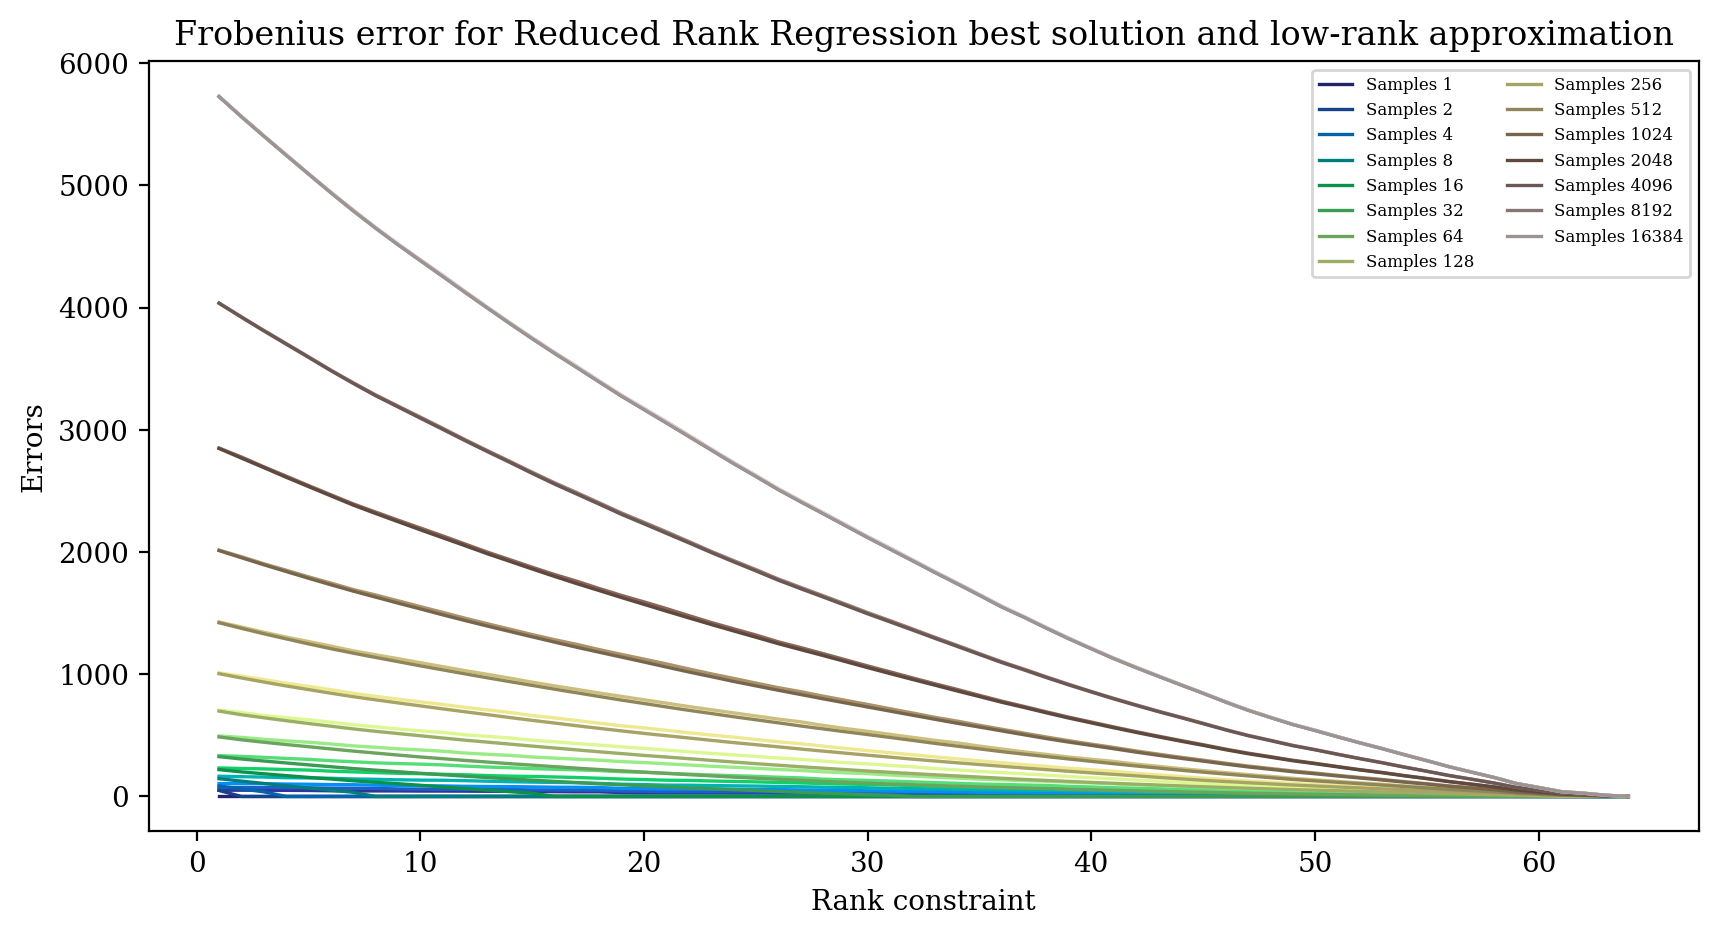

In [113]:
cmap = plt.get_cmap('terrain')

plt.rcParams["figure.dpi"] = 200
plt.rcParams['font.family'] = 'serif'

plt.figure(figsize=(10, 5))

for i, n in enumerate(list_samples):
    color_LR = cmap(i / len(list_samples))
    color_RRR = (color_LR[0] * 0.7, color_LR[1] * 0.7, color_LR[2] * 0.7)

    plt.plot(ranks, error_LR[n], color=color_LR, linewidth=1.2)
    plt.plot(ranks, error_RRR[n], color=color_RRR, linewidth=1.2, label=f"Samples {n}")

plt.legend(fontsize=6, ncols=2)
plt.xlabel("Rank constraint")
plt.ylabel("Errors")
plt.title("Frobenius error for Reduced Rank Regression best solution and low-rank approximation")
plt.plot

<function matplotlib.pyplot.plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'>

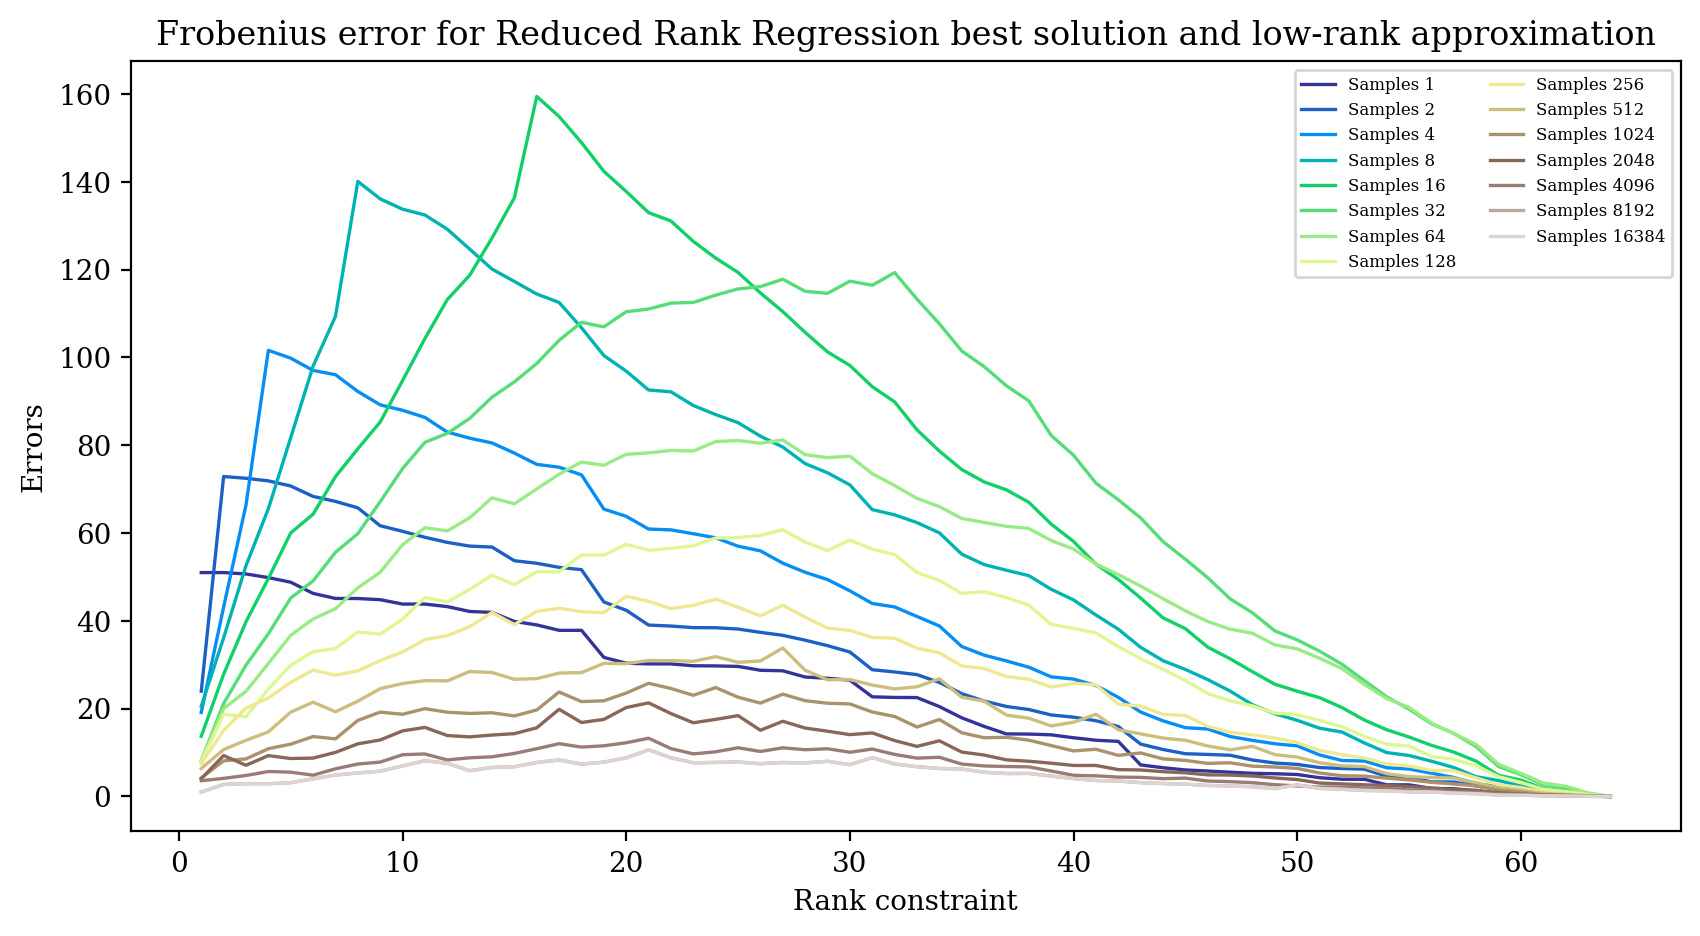

In [114]:
cmap = plt.get_cmap('terrain')

plt.rcParams["figure.dpi"] = 200
plt.rcParams['font.family'] = 'serif'

plt.figure(figsize=(10, 5))

for i, n in enumerate(list_samples):
    color_LR = cmap(i / len(list_samples))
    color_RRR = (color_LR[0] * 0.7, color_LR[1] * 0.7, color_LR[2] * 0.7)

    plt.plot(ranks, torch.abs(torch.tensor(error_LR[n]) - torch.tensor(error_RRR[n])), color=color_LR, linewidth=1.2, label=f"Samples {n}")

plt.legend(fontsize=6, ncols=2)
plt.xlabel("Rank constraint")
plt.ylabel("Errors")
plt.title("Frobenius error for Reduced Rank Regression best solution and low-rank approximation")
plt.plot

In [115]:
error_LR_rev = {r: [] for r in ranks}
error_RRR_rev = {r: [] for r in ranks}

for n in list_samples:
    for r, (e_LR, e_RRR) in enumerate(zip(error_LR[n], error_RRR[n])):
        error_LR_rev[ranks[r]].append(e_LR)
        error_RRR_rev[ranks[r]].append(e_RRR)

Text(0.5, 1.0, 'Absolute error for RRR vs LR $\\quad ||B_{RRR} - B_{LR}||_F$')

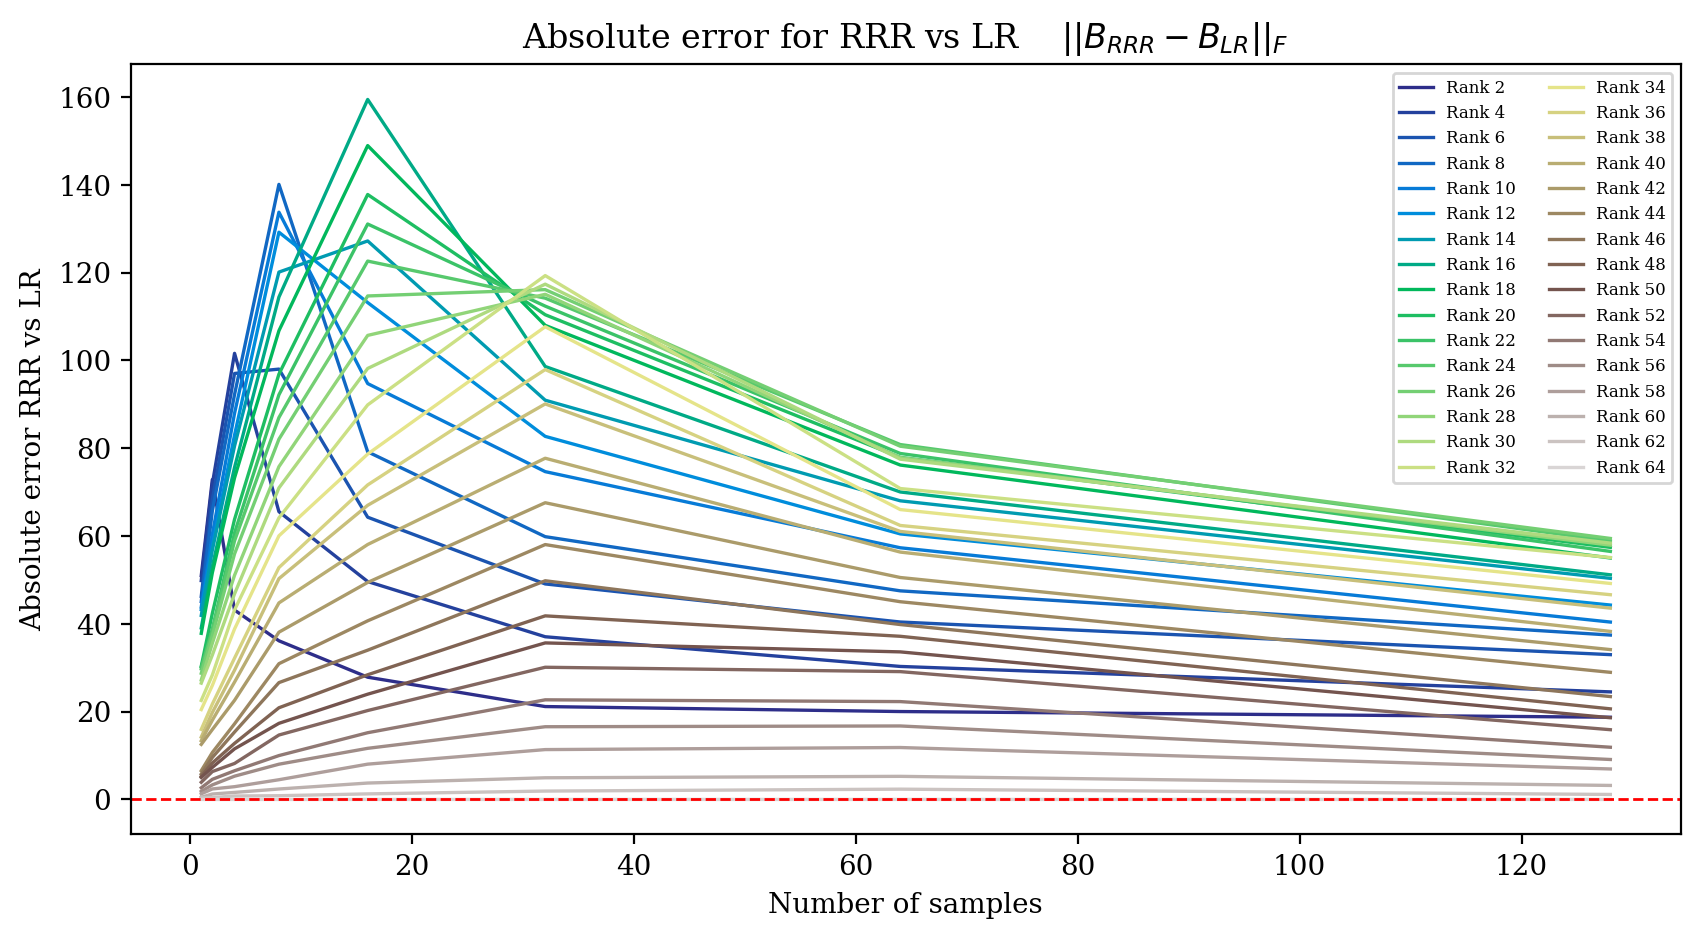

In [105]:
cmap = plt.get_cmap('terrain')

plt.rcParams["figure.dpi"] = 200
plt.rcParams['font.family'] = 'serif'

plt.figure(figsize=(10, 5))

for i, rank in enumerate(ranks[1::2]):
    color = cmap(i / len(ranks[1::2]))
    color = (color[0] * 0.9, color[1] * 0.9, color[2] * 0.9)
    abs_error = torch.abs(torch.tensor(error_LR_rev[rank]) - torch.tensor(error_RRR_rev[rank]))
    plt.plot(list_samples, abs_error, color=color, linewidth=1.2, label=f"Rank {rank}")

plt.axhline(0, color="red", linewidth=1.0, linestyle="--")

# plt.xlim(0, 2000)
plt.legend(fontsize=6, ncols=2)
plt.xlabel("Number of samples")
plt.ylabel("Absolute error RRR vs LR")
plt.title(r"Absolute error for RRR vs LR $\quad ||B_{RRR} - B_{LR}||_F$")